# Section 1: Downloading Flight for Testing datasets

This section downloads both departure and arrival dataset from [tablebuilder.singsat](https://tablebuilder.singstat.gov.sg/), Depart of Statistics Singapore website. Files are dowloaded in our google drive and extract from there in the code. 2023-2024 will represent 30%.

In [ ]:
#To download from google drive
pip install gdown

## Section 1.1 : Downloading Flight Departure For Testing

In [ ]:
import gdown
import pandas as pd

# Google Drive Departure Dataset 23/24 ID
fileDep_id = "1CfEgn8RMfwpG_0RyUc3RvQFf03_LWQRQ"
fileDep_name = "departure_test-23-24.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={fileDep_id}", fileDep_name, quiet=False)

# Load the CSV file into a Pandas DataFrame
df_d_test = pd.read_csv(fileDep_name, header=9)

# Remove NaN entries
df_d_test = df_d_test.dropna()

df_d_test.set_index(df_d_test.columns[0], inplace=True)

# Transpose the DataFrame (convert months → columns, countries → rows)
df_d_test = df_d_test.T.reset_index()

# Rename columns
df_d_test.rename(columns={"index": "Country"}, inplace=True)

# Reshape using melt()
df_long_test = df_d_test.melt(id_vars=["Country"], var_name="Month (YYYY-MM)", value_name="Departures")

# Save or display results
#df_long.to_csv("departures_refactor.csv", index=False)
print(df_long_test.head())  # View first few rows


In [ ]:

pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)

# Remove the common prefix and suffix from the 'Country' column
df_long_test['Country'] = df_long_test['Country'].str.replace('Number Of Air Passenger Departures -> ', '', regex=False)
df_long_test['Country'] = df_long_test['Country'].str.replace(' (Number)', '', regex=False)

# Display the updated DataFrame
print(df_long_test.head(30))

In [4]:
# Create a new DataFrame with only country names
df_countries_test = df_long_test[df_long_test['Country'].str.contains('->')].copy()

# Extract the country names by splitting and taking the last part
df_countries_test['Country'] = df_countries_test['Country'].apply(lambda x: x.split('->')[-1].strip())

# Rest index numbering for each entry
df_countries_index_test = df_countries_test.reset_index(drop=True)

# Change to interger type for Departure column
df_countries_index_test['Departures'] = df_countries_index_test['Departures'].astype(int)

df_countries_index_test['Month (YYYY-MM)'] = pd.to_datetime(
    df_countries_index_test['Month (YYYY-MM)'].str.strip(), format='%Y %b'
).dt.strftime('%Y-%m')


# Export into CSV
df_countries_index_test.to_csv("departures_test_final.csv", index=False)

# Display the new DataFrame
df_countries_index_dep_test = df_countries_index_test




## Section 1.2 : Downloading Flight Arrivals For Testing

In [ ]:
import gdown
import pandas as pd

# Google Drive Arrival Dataset 23/24 ID
fileArr_id = "10KuTnelehV6N54pZos56sXkVH7Z5HIfY"
fileArr_name = "arrival_test-23-24.csv"


# Download the file
gdown.download(f"https://drive.google.com/uc?id={fileArr_id}", fileArr_name, quiet=False)

# Load the CSV file into a Pandas DataFrame
df_a_test = pd.read_csv(fileArr_name, header=9)

# Remove NaN entries
df_a_test = df_a_test.dropna()

df_a_test.set_index(df_a_test.columns[0], inplace=True)

# Transpose the DataFrame (convert months → columns, countries → rows)
df_a_test = df_a_test.T.reset_index()

# Rename columns
df_a_test.rename(columns={"index": "Country"}, inplace=True)

# Reshape using melt()
df_arr_test = df_a_test.melt(id_vars=["Country"], var_name="Month (YYYY-MM)", value_name="Arrivals")

# Save or display results
print(df_arr_test.head())  # View first few rows


In [ ]:

pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)

# Remove the common prefix and suffix from the 'Country' column
df_arr_test['Country'] = df_arr_test['Country'].str.replace('Number Of Air Passenger Arrivals -> ', '', regex=False)
df_arr_test['Country'] = df_arr_test['Country'].str.replace(' (Number)', '', regex=False)

# Display the updated DataFrame
print(df_arr_test.head(30))

In [ ]:
# Create a new DataFrame with only country names
df_countries_arr_test = df_arr_test[df_arr_test['Country'].str.contains('->')].copy()

# Extract the country names by splitting and taking the last part
df_countries_arr_test['Country'] = df_countries_arr_test['Country'].apply(lambda x: x.split('->')[-1].strip())

# Rest index numbering for each entry
df_countries_index_arr_test = df_countries_arr_test.reset_index(drop=True)

# Change to interger type for Arrivals column
df_countries_index_arr_test['Arrivals'] = pd.to_numeric(df_countries_index_arr_test['Arrivals'], errors='coerce').fillna(0).astype(int)

# Changing format for date
df_countries_index_arr_test['Month (YYYY-MM)'] = pd.to_datetime(
    df_countries_index_arr_test['Month (YYYY-MM)'].str.strip(), format='%Y %b'
).dt.strftime('%Y-%m')

# Export to CSV
df_countries_index_arr_test.to_csv("arrivals_test_final.csv", index=False)

# Display the new DataFrame
df_countries_index_arr_test

## Section 1.3 : Merging Flight Departures & Arrivals For Testing

In [8]:
import pandas as pd

# Merge based on 'Country' and 'Month (YYYY-MM)'
merged_df_test = pd.merge(df_countries_index_arr_test, df_countries_index_dep_test, on=["Country", "Month (YYYY-MM)"], how="inner")

merged_df_test.to_csv("merged_flight_testing.csv",index=False )


# Section 2: Downloading Flight Training datasets

This section downloads both departure and arrival dataset from [tablebuilder.singsat](https://tablebuilder.singstat.gov.sg/), Depart of Statistics Singapore website. Files are dowloaded in our google drive and extract from there in the code. Remaining 70% will be base of (24 months / 30%) * 70% = **56 months**. We will take 56 months before [covid-19](https://en.wikipedia.org/wiki/COVID-19_pandemic#:~:text=The%20COVID%2D19%20pandemic%20(also,then%20worldwide%20in%20early%202020.))(Dec 19) as it will be the outlier of our dataset.

## Section 2.1 : Downloading Flight Departure For Training

In [ ]:
import gdown
import pandas as pd

# Google Drive Departure Dataset 15/19 ID
fileDep_id = "12IQx7qGJGd3i1rUVUo5L1eaN7lGa9H16"
fileDep_name = "departure_train-15-24.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={fileDep_id}", fileDep_name, quiet=False)

# Load the CSV file into a Pandas DataFrame
df_d_train = pd.read_csv(fileDep_name, header=9)

# Remove NaN entries
df_d_train = df_d_train.dropna()

df_d_train.set_index(df_d_train.columns[0], inplace=True)

# Transpose the DataFrame (convert months → columns, countries → rows)
df_d_train = df_d_train.T.reset_index()

# Rename columns
df_d_train.rename(columns={"index": "Country"}, inplace=True)

# Reshape using melt()
df_long_train = df_d_train.melt(id_vars=["Country"], var_name="Month (YYYY-MM)", value_name="Departures")

# Save or display results
#df_long.to_csv("departures_refactor.csv", index=False)
print(df_long_train.head())  # View first few rows


In [ ]:

pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)

# Remove the common prefix and suffix from the 'Country' column
df_long_train['Country'] = df_long_train['Country'].str.replace('Number Of Air Passenger Departures -> ', '', regex=False)
df_long_train['Country'] = df_long_train['Country'].str.replace(' (Number)', '', regex=False)

# Display the updated DataFrame
print(df_long_train.head(30))

In [11]:
# Create a new DataFrame with only country names
df_countries_train = df_long_train[df_long_train['Country'].str.contains('->')].copy()

# Extract the country names by splitting and taking the last part
df_countries_train['Country'] = df_countries_train['Country'].apply(lambda x: x.split('->')[-1].strip())

# Rest index numbering for each entry
df_countries_index_train = df_countries_train.reset_index(drop=True)

# Change to interger type for Departure column
df_countries_index_train['Departures'] = df_countries_index_train['Departures'].astype(int)

df_countries_index_train['Month (YYYY-MM)'] = pd.to_datetime(
    df_countries_index_train['Month (YYYY-MM)'].str.strip(), format='%Y %b'
).dt.strftime('%Y-%m')


# Export into CSV
df_countries_index_train.to_csv("departures_train_final.csv", index=False)

# Display the new DataFrame
df_countries_index_dep_train = df_countries_index_train




## Section 2.2 : Downloading Flight Arrivals For Training

In [ ]:
import gdown
import pandas as pd

# Google Drive Arrival Dataset 15/19 ID
fileArr_id = "1KayLfND03TnB7JNCERYAV1d6GaDPpN2L"
fileArr_name = "arrival_test-15-19.csv"


# Download the file
gdown.download(f"https://drive.google.com/uc?id={fileArr_id}", fileArr_name, quiet=False)

# Load the CSV file into a Pandas DataFrame
df_a_train = pd.read_csv(fileArr_name, header=9)

# Remove NaN entries
df_a_train = df_a_train.dropna()

df_a_train.set_index(df_a_train.columns[0], inplace=True)

# Transpose the DataFrame (convert months → columns, countries → rows)
df_a_train = df_a_train.T.reset_index()

# Rename columns
df_a_train.rename(columns={"index": "Country"}, inplace=True)

# Reshape using melt()
df_arr_train = df_a_train.melt(id_vars=["Country"], var_name="Month (YYYY-MM)", value_name="Arrivals")

# Save or display results
print(df_arr_train.head())  # View first few rows


In [ ]:

pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)

# Remove the common prefix and suffix from the 'Country' column
df_arr_train['Country'] = df_arr_train['Country'].str.replace('Number Of Air Passenger Arrivals -> ', '', regex=False)
df_arr_train['Country'] = df_arr_train['Country'].str.replace(' (Number)', '', regex=False)

# Display the updated DataFrame
print(df_arr_train.head(30))

In [ ]:
# Create a new DataFrame with only country names
df_countries_arr_train = df_arr_train[df_arr_train['Country'].str.contains('->')].copy()

# Extract the country names by splitting and taking the last part
df_countries_arr_train['Country'] = df_countries_arr_train['Country'].apply(lambda x: x.split('->')[-1].strip())

# Rest index numbering for each entry
df_countries_index_arr_train = df_countries_arr_train.reset_index(drop=True)

# Change to interger type for Arrivals column
df_countries_index_arr_train['Arrivals'] = pd.to_numeric(df_countries_index_arr_train['Arrivals'], errors='coerce').fillna(0).astype(int)

# Changing format for date
df_countries_index_arr_train['Month (YYYY-MM)'] = pd.to_datetime(
    df_countries_index_arr_train['Month (YYYY-MM)'].str.strip(), format='%Y %b'
).dt.strftime('%Y-%m')

# Export to CSV
df_countries_index_arr_train.to_csv("arrivals_train_final.csv", index=False)

# Display the new DataFrame
df_countries_index_arr_train

## Section 2.3 : Merging Flight Departures & Arrivals For Testing

In [15]:
import pandas as pd

# Merge based on 'Country' and 'Month (YYYY-MM)'
merged_df_train = pd.merge(df_countries_index_arr_train, df_countries_index_dep_train, on=["Country", "Month (YYYY-MM)"], how="inner")

merged_df_train.to_csv("merged_flight_train.csv",index=False )


# Section 3.0 : Web crawling from www.timeanddate.com

In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime

# Load unique countries from flights.csv
flights_df = pd.read_csv("merged_flight_train.csv")

# Define a mapping for country name standardization
country_name_mapping = {
    "Mainland China": "China"
}

# Apply the mapping to standardize country names in flights.csv
flights_df["Country"] = flights_df["Country"].replace(country_name_mapping)
unique_countries = flights_df["Country"].unique()

# Base URL template for holiday scraping
BASE_URL = "https://www.timeanddate.com/calendar/custom.html?year={year}&country={country}&cols=3&df=1&hol=1&lang=en"

# Main URL to get country list
URL = "https://www.timeanddate.com/calendar/custom.html"

# Get the list of countries from the dropdown on the website
resp = requests.get(URL)
soup = BeautifulSoup(resp.text, "html.parser")
country_select = soup.find("select", {"id": "sf_country"})

# Extract country codes and names from the website
countries = {option["value"]: option.text.strip() for option in country_select.find_all("option")}

# Filter only relevant countries based on flights.csv (after mapping)
filtered_countries = {code: name for code, name in countries.items() if name in unique_countries}

# Years 2015 - 2024
years = list(range(2015, 2025))

# List to store extracted holiday data
holiday_data = []

def format_date(dd_mmm, year):
    try:
        # Convert "1 Jan" to a datetime object
        date_obj = datetime.strptime(f"{dd_mmm} {year}", "%d %b %Y")

        # Convert to required formats
        full_date = date_obj.strftime("%Y-%m-%d")  # YYYY-MM-DD

        return full_date
    except ValueError:
        return None, None  # Handle unexpected formats

# Iterate over only relevant countries and years
for country_code, country_name in tqdm(filtered_countries.items(), desc="Scraping holidays"):
    for year in years:
        url = BASE_URL.format(year=year, country=country_code)
        resp = requests.get(url)

        if resp.status_code == 200:
            soup = BeautifulSoup(resp.text, "html.parser")
            holiday_table = soup.find("table", {"class": "cl1h"})

            if holiday_table:
                for holiday_row in holiday_table.find_all("tr"):
                    date_span = holiday_row.find("span", {"class": "co1"})
                    name_td = holiday_row.find("a")

                    if date_span and name_td:
                        raw_date = date_span.text.strip()
                        full_date = format_date(raw_date, year)  # Format date
                        holiday_name = name_td.text.strip()

                        if full_date:
                            # Append row to list
                            holiday_data.append([full_date, holiday_name, country_name, year])

# Convert to DataFrame
df = pd.DataFrame(holiday_data, columns=["Date", "Event", "Country", "Year"])

# Save to Excel
df.to_excel("holidays.xlsx", index=False)

print("Data successfully saved to holidays.xlsx")

## Section 3.1 : Clean holiday dataset

In [ ]:
# Load the excel file from Section 1
file_path = "holidays.xlsx"
df = pd.read_excel(file_path)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned data back to an Excel file
cleaned_file_path = "holidays_cleaned.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)

print("Duplicates removed. Cleaned data saved to:", cleaned_file_path)

## Section 3.2 : Number of holidays for that month

In [ ]:
# Load the holiday dataset
holiday_df = pd.read_excel("holidays_cleaned.xlsx")

# Standardize country names using a mapping dictionary
country_name_mapping = {
    "China" : "Mainland China"
}

# Replace country names in holiday_df
holiday_df["Country"] = holiday_df["Country"].replace(country_name_mapping)

# Convert 'Date' to datetime format
holiday_df["Date"] = pd.to_datetime(holiday_df["Date"])

# Extract Year-Month in 'YYYY-MM' format
holiday_df["Month (YYYY-MM)"] = holiday_df["Date"].dt.strftime("%Y-%m")

# Count holidays per country per month
holiday_counts = (
    holiday_df.groupby(["Country", "Month (YYYY-MM)"])
    .size()
    .reset_index(name="No of holidays")
)

# List of input and output files
files = {
    "merged_flight_testing.csv": "merged_flight_testing_with_holidays.csv",
    "merged_flight_train.csv": "merged_flight_train_with_holidays.csv",
}

# Process each file
for input_file, output_file in files.items():
    # Load the dataset
    df = pd.read_csv(input_file)

    # Merge with holiday data
    merged_df = df.merge(holiday_counts, on=["Country", "Month (YYYY-MM)"], how="left")

    # Fill NaN values with 0 in case some months have no holidays
    merged_df["No of holidays"] = merged_df["No of holidays"].fillna(0).astype(int)

    # Save the updated file
    merged_df.to_csv(output_file, index=False)

    print(f"Processed and saved: {output_file}")

# Section 4 : Data analysis and visualisation

This section is to analyse the data to help understand and choosing of features.

## Section 4.1 : Holidays vs Arrivals/Departures

In [ ]:
#pip install seaborn
!pip install --upgrade pandas

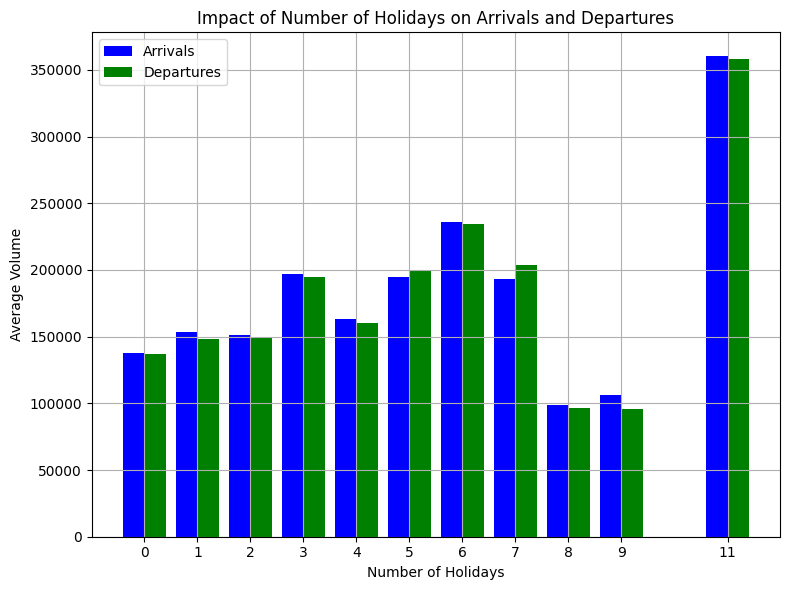

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset/merged_flight_train_with_holidays.csv')


# Assuming df is your original DataFrame
df_grouped = df.groupby('No of holidays')[['Arrivals', 'Departures']].mean().reset_index()

# Bar chart with arrivals and departures side by side
plt.figure(figsize=(8, 6))
bar_width = 0.4
index = df_grouped['No of holidays']

plt.bar(index - bar_width/2, df_grouped['Arrivals'], bar_width, label='Arrivals', color='blue')
plt.bar(index + bar_width/2, df_grouped['Departures'], bar_width, label='Departures', color='green')

plt.xlabel('Number of Holidays')
plt.ylabel('Average Volume')
plt.title('Impact of Number of Holidays on Arrivals and Departures')
plt.xticks(index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Section 4.2 : Average by Country

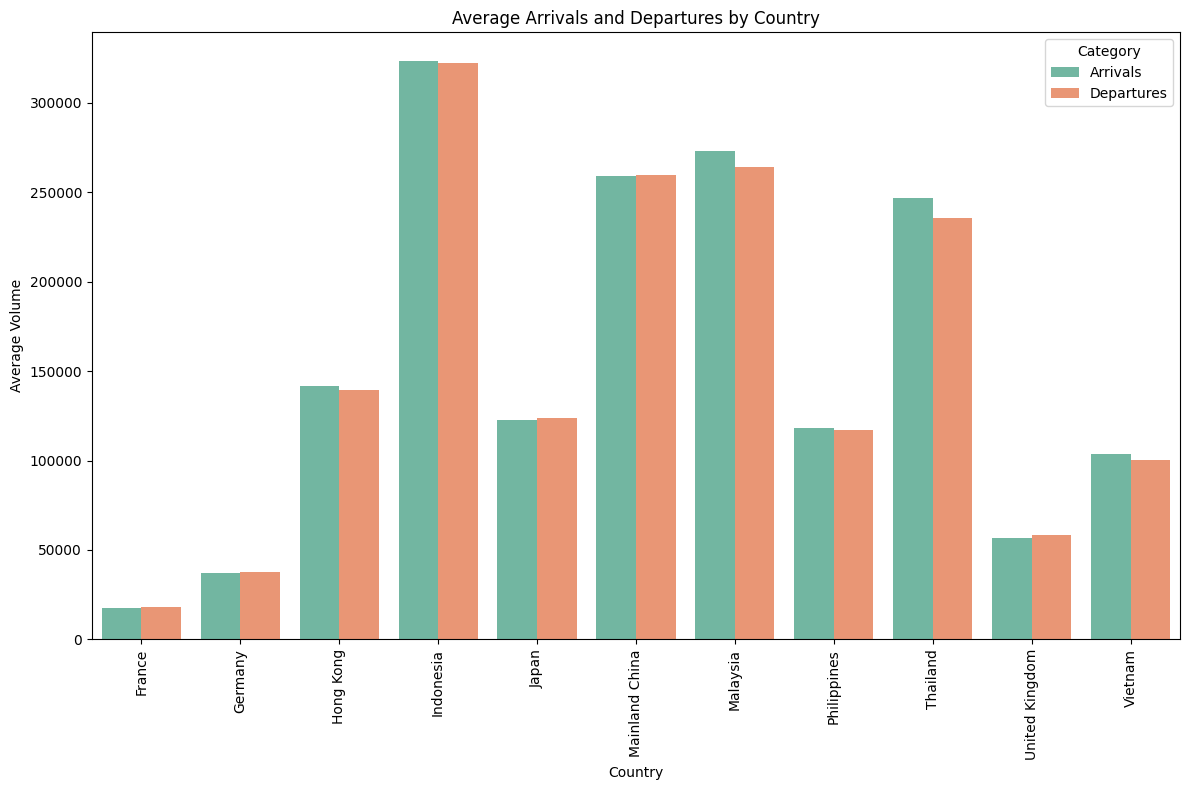

In [73]:
# Average arrivals and departures by country
country_impact = df.groupby('Country')[['Arrivals', 'Departures']].mean().reset_index()

# Visualization with side-by-side bars for all countries
plt.figure(figsize=(12, 8))
sns.barplot(
    data=country_impact.melt(id_vars='Country', value_vars=['Arrivals', 'Departures']),
    x='Country', y='value', hue='variable', palette='Set2'
)
plt.xticks(rotation=90)  # Rotate for better readability
plt.title('Average Arrivals and Departures by Country')
plt.xlabel('Country')
plt.ylabel('Average Volume')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Section 4.3 : Holidays vs Monthly Arrivals/Departures per Country

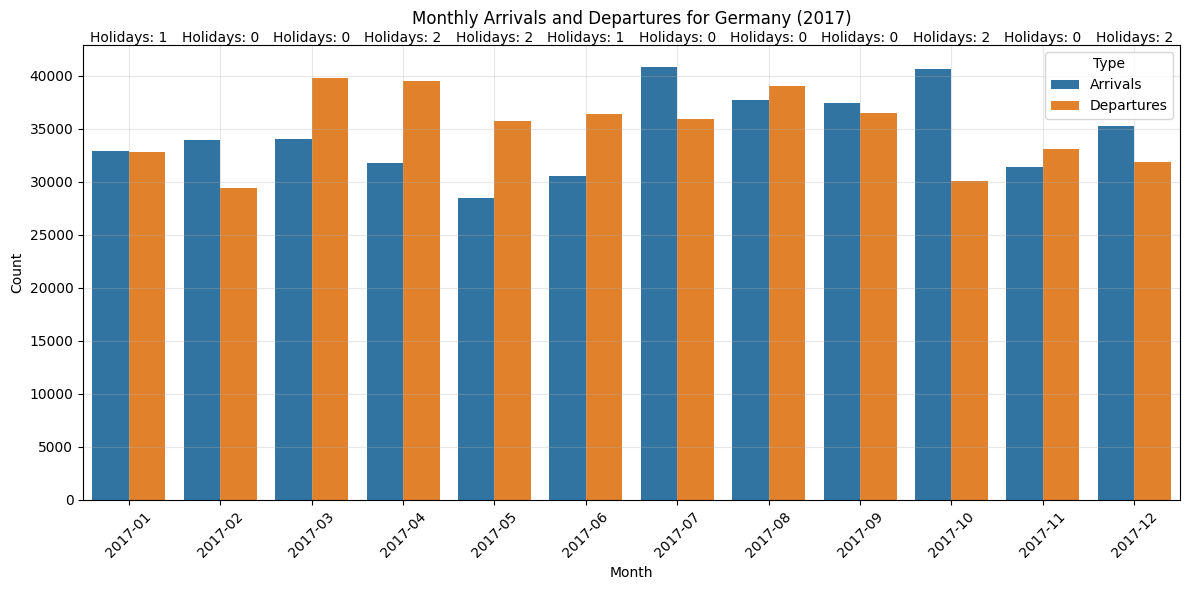


Monthly data for Germany in 2017:
Month (YYYY-MM)  No of holidays  Arrivals  Departures
        2017-01               1     32906       32774
        2017-02               0     33919       29405
        2017-03               0     34072       39825
        2017-04               2     31759       39486
        2017-05               2     28513       35749
        2017-06               1     30566       36404
        2017-07               0     40878       35967
        2017-08               0     37694       39054
        2017-09               0     37404       36455
        2017-10               2     40676       30107
        2017-11               0     31359       33092
        2017-12               2     35287       31863


In [74]:
# Filter for specific country and year
country_name = 'Germany'
year = 2017

# Filter data
country_data = df[
    (df['Country'] == country_name) & 
    (pd.to_datetime(df['Month (YYYY-MM)']).dt.year == year)
]

# Sort by month
country_data = country_data.sort_values('Month (YYYY-MM)')

# Create the visualization
plt.figure(figsize=(12, 6))

# Prepare data for grouped bar plot
country_data_melted = country_data.melt(
    id_vars=['Month (YYYY-MM)', 'No of holidays'],
    value_vars=['Arrivals', 'Departures'],
    var_name='Type', 
    value_name='Count'
)

# Create grouped bar plot
sns.barplot(
    data=country_data_melted, 
    x='Month (YYYY-MM)', 
    y='Count', 
    hue='Type'
)

# Customize the plot
plt.title(f'Monthly Arrivals and Departures for {country_name} ({year})', fontsize=12, pad=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(title='Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Alternative way to add holiday count text
for i, (_, row) in enumerate(country_data.iterrows()):
    plt.text(i, plt.ylim()[1], f'Holidays: {row["No of holidays"]}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numerical results
print(f"\nMonthly data for {country_name} in {year}:")
print(country_data[['Month (YYYY-MM)', 'No of holidays', 'Arrivals', 'Departures']].to_string(index=False))

## Section 4.4 : Monthly Arrivals across 5 years

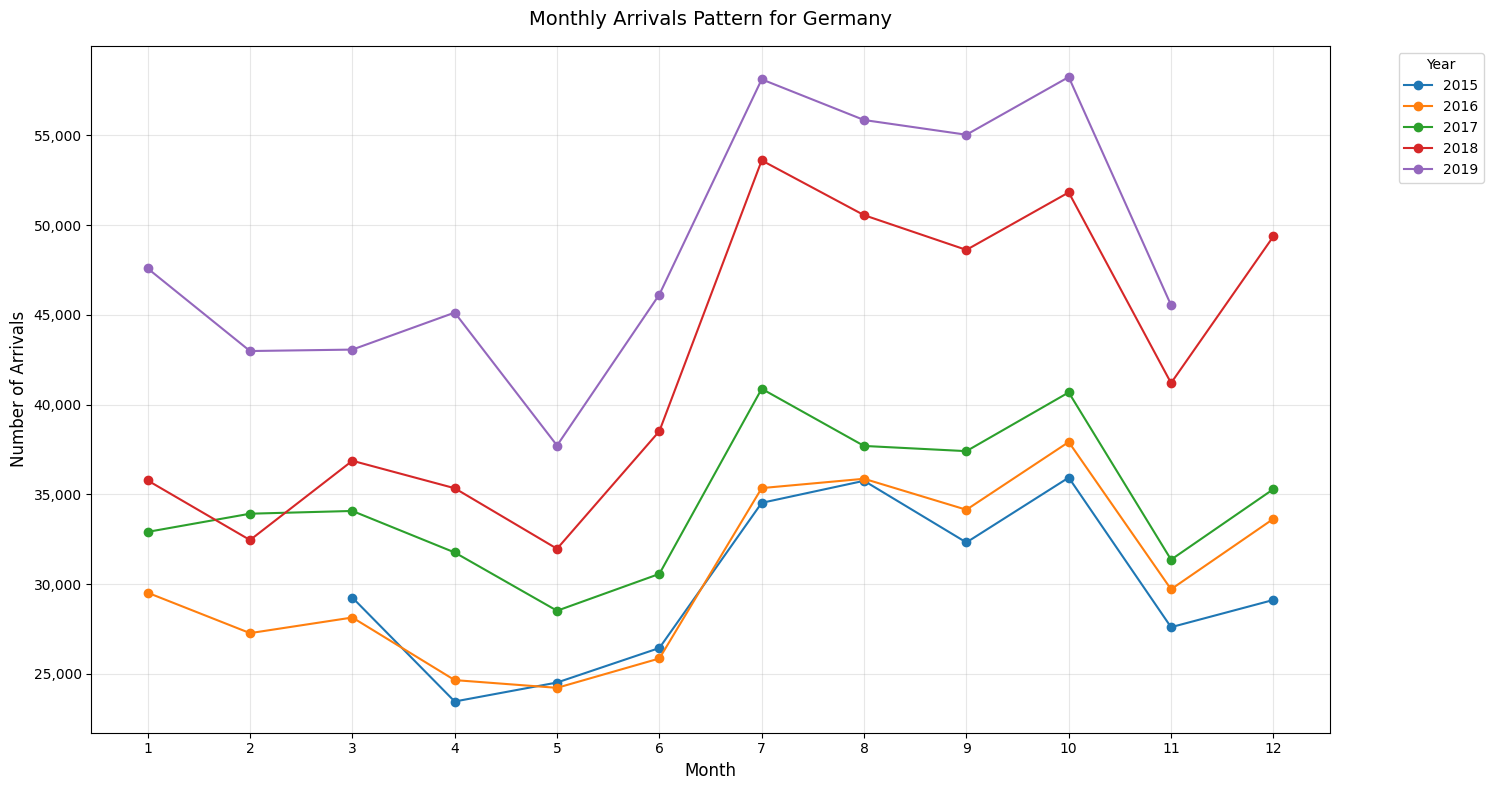


Monthly Statistics for Germany across all years:
           mean    min    max
Month                        
1      36443.50  29516  47582
2      34154.25  27266  42981
3      34276.40  28136  43061
4      32065.20  23457  45123
5      29385.40  24218  37717
6      33500.60  25854  46129
7      44492.80  34524  58117
8      43142.60  35752  55851
9      41501.20  32317  55031
10     44916.40  35931  58244
11     35080.40  27597  45538
12     36850.50  29114  49368


In [75]:
# Convert Month column to datetime
df['Month (YYYY-MM)'] = pd.to_datetime(df['Month (YYYY-MM)'])

# Extract year and month
df['Year'] = df['Month (YYYY-MM)'].dt.year
df['Month'] = df['Month (YYYY-MM)'].dt.month

# Select a country
country_name = 'Germany'
country_data = df[df['Country'] == country_name]

# Create the visualization
plt.figure(figsize=(15, 8))

# Create line plot for each year
for year in sorted(country_data['Year'].unique()):
    year_data = country_data[country_data['Year'] == year]
    plt.plot(
        year_data['Month'], 
        year_data['Arrivals'], 
        marker='o',
        label=str(year)
    )

# Customize the plot
plt.title(f'Monthly Arrivals Pattern for {country_name}', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Arrivals', fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis ticks to show all months
plt.xticks(range(1, 13))

# Format y-axis with comma separator for thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print monthly statistics across years
monthly_stats = country_data.groupby('Month')['Arrivals'].agg(['mean', 'min', 'max'])
print(f"\nMonthly Statistics for {country_name} across all years:")
print(monthly_stats)

## Section 4.5 : Difference in growth rate 

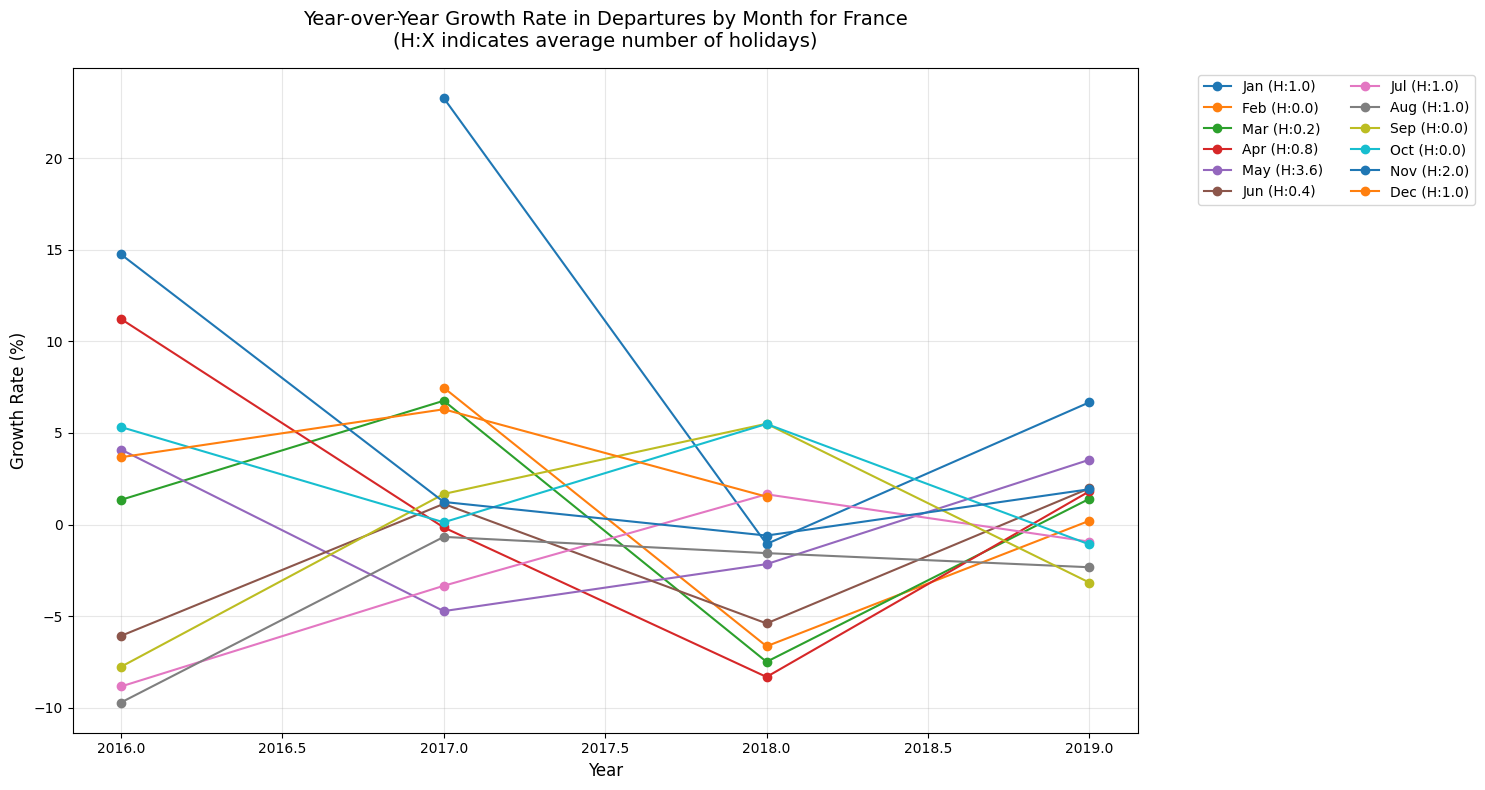


Monthly Growth Rate Statistics for France:

Average Growth Rates and Holiday Counts by Month:
Month | Avg Holidays | Avg Growth Rate
----------------------------------------
January    |         1.0 |          9.63%
February   |         0.0 |          0.35%
March      |         0.2 |          0.51%
April      |         0.8 |          1.14%
May        |         3.6 |          0.19%
June       |         0.4 |         -2.09%
July       |         1.0 |         -2.86%
August     |         1.0 |         -3.57%
September  |         0.0 |         -0.94%
October    |         0.0 |          2.47%
November   |         2.0 |          4.33%
December   |         1.0 |          3.83%

Correlation between average holidays and growth rate: 0.112


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Load the dataset
df = pd.read_csv('Dataset/merged_flight_train_with_holidays.csv')

# Convert Month column to datetime
df['Month (YYYY-MM)'] = pd.to_datetime(df['Month (YYYY-MM)'])
df['Year'] = df['Month (YYYY-MM)'].dt.year
df['Month'] = df['Month (YYYY-MM)'].dt.month

# Select a country
country_name = 'France'
country_data = df[df['Country'] == country_name]

# Calculate average holidays per month
monthly_holidays = country_data.groupby('Month')['No of holidays'].mean()

# Create the visualization
plt.figure(figsize=(15, 8))

# Calculate and plot growth rates for each month
for month in range(1, 13):
    month_data = country_data[country_data['Month'] == month].sort_values('Year')
    
    # Calculate growth rates
    departures = month_data['Departures'].values
    growth_rates = [(departures[i] - departures[i-1]) / departures[i-1] * 100 
                    for i in range(1, len(departures))]
    years = month_data['Year'].iloc[1:].values
    
    # Plot with average holiday count in legend
    plt.plot(years, growth_rates, 'o-', 
             label=f'{calendar.month_abbr[month]} (H:{monthly_holidays[month]:.1f})')

# Customize the plot
plt.title(f'Year-over-Year Growth Rate in Departures by Month for {country_name}\n(H:X indicates average number of holidays)', 
          fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add legend with two columns
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\nMonthly Growth Rate Statistics for {country_name}:")
print("\nAverage Growth Rates and Holiday Counts by Month:")
print("Month | Avg Holidays | Avg Growth Rate")
print("-" * 40)

for month in range(1, 13):
    month_data = country_data[country_data['Month'] == month].sort_values('Year')
    departures = month_data['Departures'].values
    growth_rates = [(departures[i] - departures[i-1]) / departures[i-1] * 100 
                    for i in range(1, len(departures))]
    
    avg_growth = np.mean(growth_rates) if growth_rates else 0
    avg_holidays = monthly_holidays[month]
    
    print(f"{calendar.month_name[month]:<10} | {avg_holidays:>11.1f} | {avg_growth:>13.2f}%")

# Calculate correlation between average holidays and average growth rates
monthly_growth_rates = []
for month in range(1, 13):
    month_data = country_data[country_data['Month'] == month].sort_values('Year')
    departures = month_data['Departures'].values
    growth_rates = [(departures[i] - departures[i-1]) / departures[i-1] * 100 
                    for i in range(1, len(departures))]
    monthly_growth_rates.append(np.mean(growth_rates) if growth_rates else 0)

correlation = np.corrcoef(monthly_holidays, monthly_growth_rates)[0,1]
print(f"\nCorrelation between average holidays and growth rate: {correlation:.3f}")